In [17]:
import pandas as pd
import numpy as np

!gdown "https://drive.google.com/uc?id=13378lFfWVDhhP5XcLEnfpPvCdIuqksPo" -O global_air_pollution_data.csv
globalPollution=pd.read_csv("global_air_pollution_data.csv")
df=(globalPollution)
dfPollutioncopy=(df.copy())

Downloading...
From: https://drive.google.com/uc?id=13378lFfWVDhhP5XcLEnfpPvCdIuqksPo
To: /content/global_air_pollution_data.csv
100% 1.63M/1.63M [00:00<00:00, 27.6MB/s]


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
df['country_name'].fillna('Unknown', inplace=True)
df['city_name'].fillna('Unknown', inplace=True)
df = df.rename(columns={'co_aqi_value\t': 'co_aqi_value'})

Shape: (23463, 12)
         country_name         city_name  aqi_value aqi_category  co_aqi_value  \
0  Russian Federation        Praskoveya         51     Moderate             1   
1              Brazil  Presidente Dutra         41         Good             1   
2               Italy   Priolo Gargallo         66     Moderate             1   
3              Poland         Przasnysz         34         Good             1   
4              France          Punaauia         22         Good             0   

  co_aqi_category  ozone_aqi_value ozone_aqi_category  no2_aqi_value  \
0            Good               36               Good              0   
1            Good                5               Good              1   
2            Good               39               Good              2   
3            Good               34               Good              0   
4            Good               22               Good              0   

  no2_aqi_category  pm2.5_aqi_value pm2.5_aqi_category  
0   

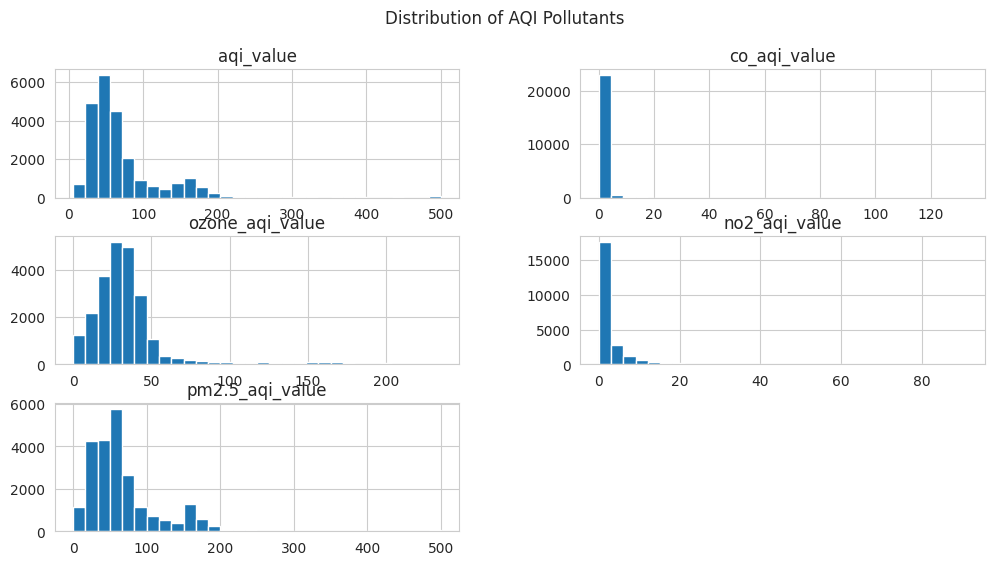

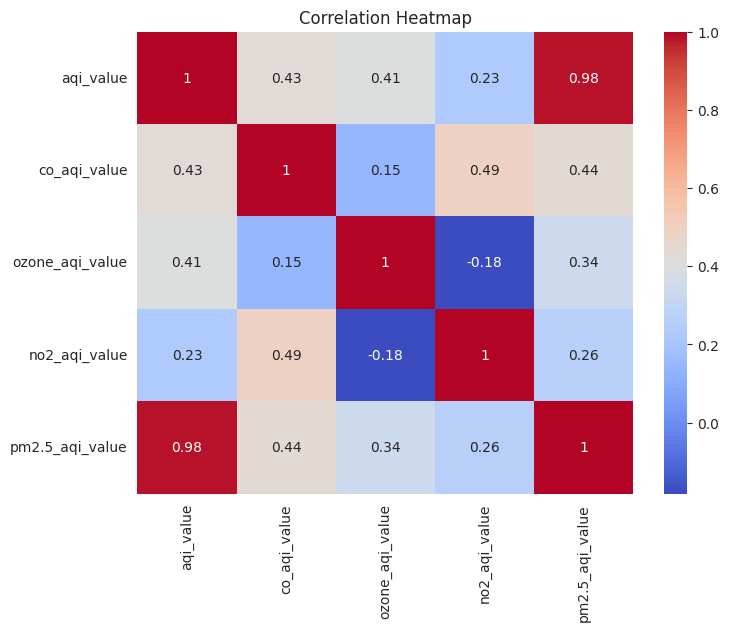

PCA explained variance: 0.781917682420933


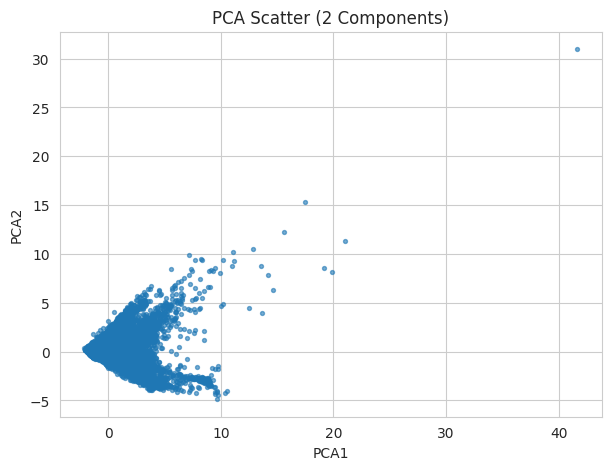

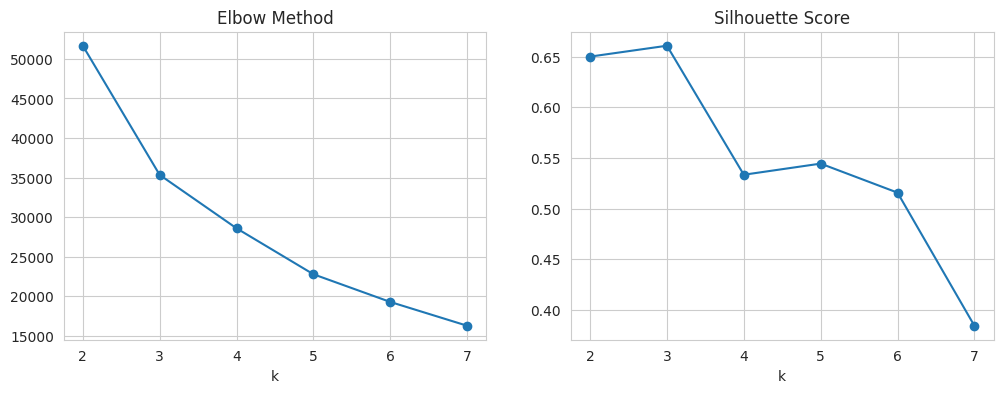

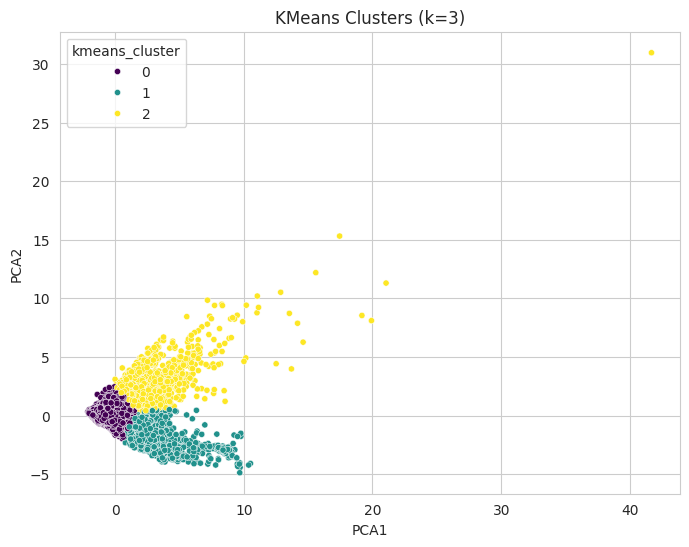

Cluster Summary:
                 aqi_value  co_aqi_value  ozone_aqi_value  no2_aqi_value  \
kmeans_cluster                                                             
0                52.614497      0.993269        30.145949       2.013979   
1               184.445596      2.167397        86.850937       1.860502   
2               128.473459      4.565589        15.602196      17.270897   

                pm2.5_aqi_value  
kmeans_cluster                   
0                     49.620865  
1                    174.891192  
2                    128.401464  


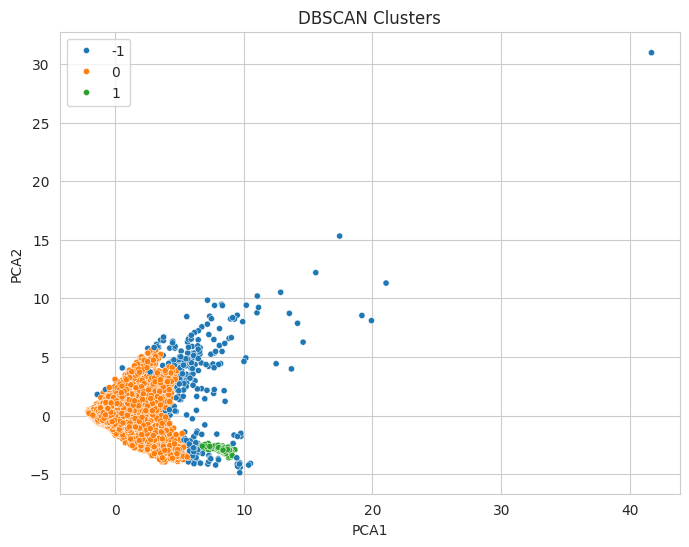

 0    23113
-1      253
 1       97
Name: count, dtype: int64
Top Outliers:
                   country_name  city_name  aqi_value    aqi_category  \
5156   United States of America    Durango        500       Hazardous   
14498                     Japan      Asahi         52        Moderate   
12800                  Malaysia       Miri        209  Very Unhealthy   
12312        Russian Federation  Poronaysk         29            Good   
12870                   Unknown    Tigzirt         50            Good   

       co_aqi_value                 co_aqi_category  ozone_aqi_value  \
5156            133  Unhealthy for Sensitive Groups                0   
14498             0                            Good               28   
12800            67                        Moderate              209   
12312             2                            Good               29   
12870             4                            Good               41   

      ozone_aqi_category  no2_aqi_value no2_aqi_cate

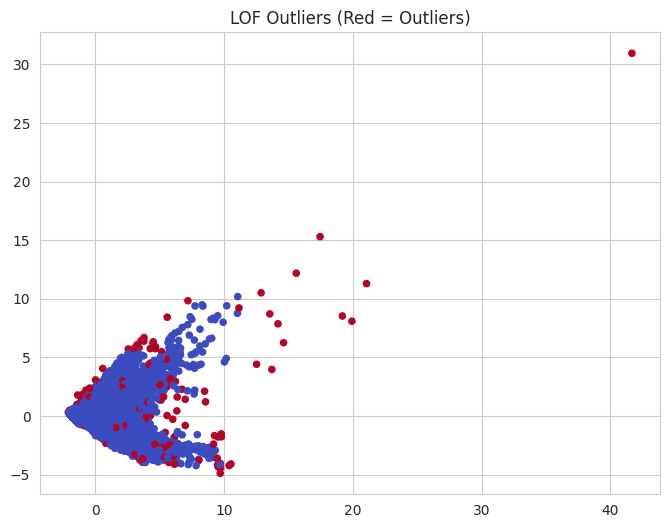

Top Rules:
                                           antecedents  \
471  (pm2.5_aqi_category_Unhealthy for Sensitive Gr...   
0                                  (aqi_category_Good)   
1                                  (aqi_category_Good)   
2                                  (aqi_category_Good)   
3                                  (aqi_category_Good)   
452  (aqi_category_Unhealthy for Sensitive Groups, ...   
440  (ozone_aqi_category_Good, no2_aqi_category_Goo...   
36                       (ozone_aqi_category_Moderate)   
29   (pm2.5_aqi_category_Unhealthy for Sensitive Gr...   
27                       (pm2.5_aqi_category_Moderate)   

                                           consequents  antecedent support  \
471  (aqi_category_Unhealthy for Sensitive Groups, ...            0.052849   
0                               (co_aqi_category_Good)            0.423475   
1                            (ozone_aqi_category_Good)            0.423475   
2                              (no2_aq

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import silhouette_score
from mlxtend.frequent_patterns import apriori, association_rules

print("Shape:", df.shape)
print(df.head())

numeric_cols = [
    "aqi_value",
    "co_aqi_value",
    "ozone_aqi_value",
    "no2_aqi_value",
    "pm2.5_aqi_value"
]

print(df[numeric_cols].describe().T)

df = df.dropna().copy()

# Remove impossible or extreme values
for col in numeric_cols:
    df = df[df[col] >= 0]

df = df.reset_index(drop=True)

df[numeric_cols].hist(figsize=(12,6), bins=30)
plt.suptitle("Distribution of AQI Pollutants")
plt.show()

plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

scaler = StandardScaler()
scaled = scaler.fit_transform(df[numeric_cols])

pca = PCA(n_components=2)
pca_2d = pca.fit_transform(scaled)

df["PCA1"] = pca_2d[:,0]
df["PCA2"] = pca_2d[:,1]

print("PCA explained variance:", pca.explained_variance_ratio_.sum())

plt.figure(figsize=(7,5))
plt.scatter(df["PCA1"], df["PCA2"], s=8, alpha=0.6)
plt.title("PCA Scatter (2 Components)")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

inertia = []
sil_scores = []
K_range = range(2,8)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(pca_2d)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(pca_2d, labels))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(K_range, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("k")

plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, marker="o")
plt.title("Silhouette Score")
plt.xlabel("k")
plt.show()

# Choose K
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['kmeans_cluster'] = kmeans.fit_predict(pca_2d)

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=df["kmeans_cluster"], palette="viridis", s=20)
plt.title(f"KMeans Clusters (k={k})")
plt.show()

print("Cluster Summary:")
print(df.groupby("kmeans_cluster")[numeric_cols].mean())

db = DBSCAN(eps=0.4, min_samples=15)
db_labels = db.fit_predict(pca_2d)
df["dbscan_cluster"] = db_labels

plt.figure(figsize=(8,6))
sns.scatterplot(x=df["PCA1"], y=df["PCA2"], hue=db_labels, palette="tab10", s=20)
plt.title("DBSCAN Clusters")
plt.show()

print(pd.Series(db_labels).value_counts())

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
lof_labels = lof.fit_predict(scaled)
df["LOF_label"] = lof_labels
df["LOF_score"] = -lof.negative_outlier_factor_

outliers = df[df["LOF_label"] == -1].sort_values("LOF_score", ascending=False)
print("Top Outliers:")
print(outliers.head())

plt.figure(figsize=(8,6))
plt.scatter(df["PCA1"], df["PCA2"], c=(df["LOF_label"]==-1), cmap="coolwarm", s=20)
plt.title("LOF Outliers (Red = Outliers)")
plt.show()

cat_cols = [
    "aqi_category",
    "co_aqi_category",
    "ozone_aqi_category",
    "no2_aqi_category",
    "pm2.5_aqi_category"
]

# one-hot encoded transactional format
trans = pd.get_dummies(df[cat_cols])

freq = apriori(trans, min_support=0.03, use_colnames=True)
rules = association_rules(freq, metric="confidence", min_threshold=0.5)

print("Top Rules:")
print(rules.sort_values("confidence", ascending=False).head(10))

df.to_csv("mined_dataset_aqi.csv", index=False)
rules.to_csv("association_rules_aqi.csv", index=False)

print("Saved: mined_dataset_aqi.csv & association_rules_aqi.csv")

### Inference of Graphs from Cell 5

1.  **Distribution of AQI Pollutants (Histograms)**:
    *   These histograms display the frequency distribution of `aqi_value`, `co_aqi_value`, `ozone_aqi_value`, `no2_aqi_value`, and `pm2.5_aqi_value`. They help us understand the typical range, spread, and skewness of each pollutant's AQI values, and identify if certain values are more common than others. For example, a right-skewed distribution might indicate that most locations have low levels, with a few having significantly higher levels.

2.  **Correlation Heatmap**:
    *   This heatmap visually represents the Pearson correlation coefficients between the numeric AQI values. A strong positive correlation (closer to 1) means that as one pollutant's AQI increases, the other tends to increase as well. A negative correlation (closer to -1) suggests an inverse relationship. This helps identify which pollutants tend to co-occur or move together.

3.  **PCA Scatter (2 Components)**:
    *   This scatter plot shows the data projected onto the first two principal components. It provides a visual representation of the overall data structure, including density, potential clusters, and any large outliers, in a reduced-dimensional space. The 'PCA explained variance' also tells us how much of the original data's variability is captured by these two components.

4.  **K-Means Elbow Method and Silhouette Score Plots**:
    *   These two plots are used to determine the optimal number of clusters (`k`) for K-Means. The "Elbow Method" plot shows how the sum of squared distances (inertia) within clusters decreases as `k` increases; the 'elbow' point suggests a good `k`. The "Silhouette Score" plot measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates better-defined clusters. Together, these graphs guide the selection of an appropriate `k` for clustering.

5.  **KMeans Clusters Scatter Plot**:
    *   This scatter plot colors the data points (in the PCA-reduced space) according to their assigned K-Means cluster. It visually demonstrates how well the K-Means algorithm has separated the data into distinct groups based on their pollutant profiles. The `Cluster Summary` provides the mean values for each pollutant within each cluster, offering a quantitative description of what characterizes each group (e.g., Cluster 1 might have high PM2.5 and low Ozone, while Cluster 2 has the opposite).

6.  **DBSCAN Clusters Scatter Plot**:
    *   This plot visualizes the results of DBSCAN clustering. Unlike K-Means, DBSCAN can find clusters of varying shapes and sizes and identifies noise points (outliers) that do not belong to any cluster. This helps understand if the data has dense, irregularly shaped groupings and where sparse, isolated points exist.

7.  **LOF Outliers (Red = Outliers) Scatter Plot**:
    *   This scatter plot highlights data points identified as local outliers by the Local Outlier Factor (LOF) algorithm. Points colored red are considered outliers, meaning they have a significantly lower density than their neighbors. This visualization helps in visually confirming and pinpointing the locations of these anomalous observations in the PCA space.

Dominant Pollutant Calculation Complete.
Dominant_Pollutant
PM2.5    18276
OZONE     5186
NO2          1
Name: count, dtype: int64

Cluster Analysis:
The Hazardous Cluster is Cluster #1 (Avg AQI: 199.72)
The Safest Cluster is Cluster #0 (Avg AQI: 57.85)


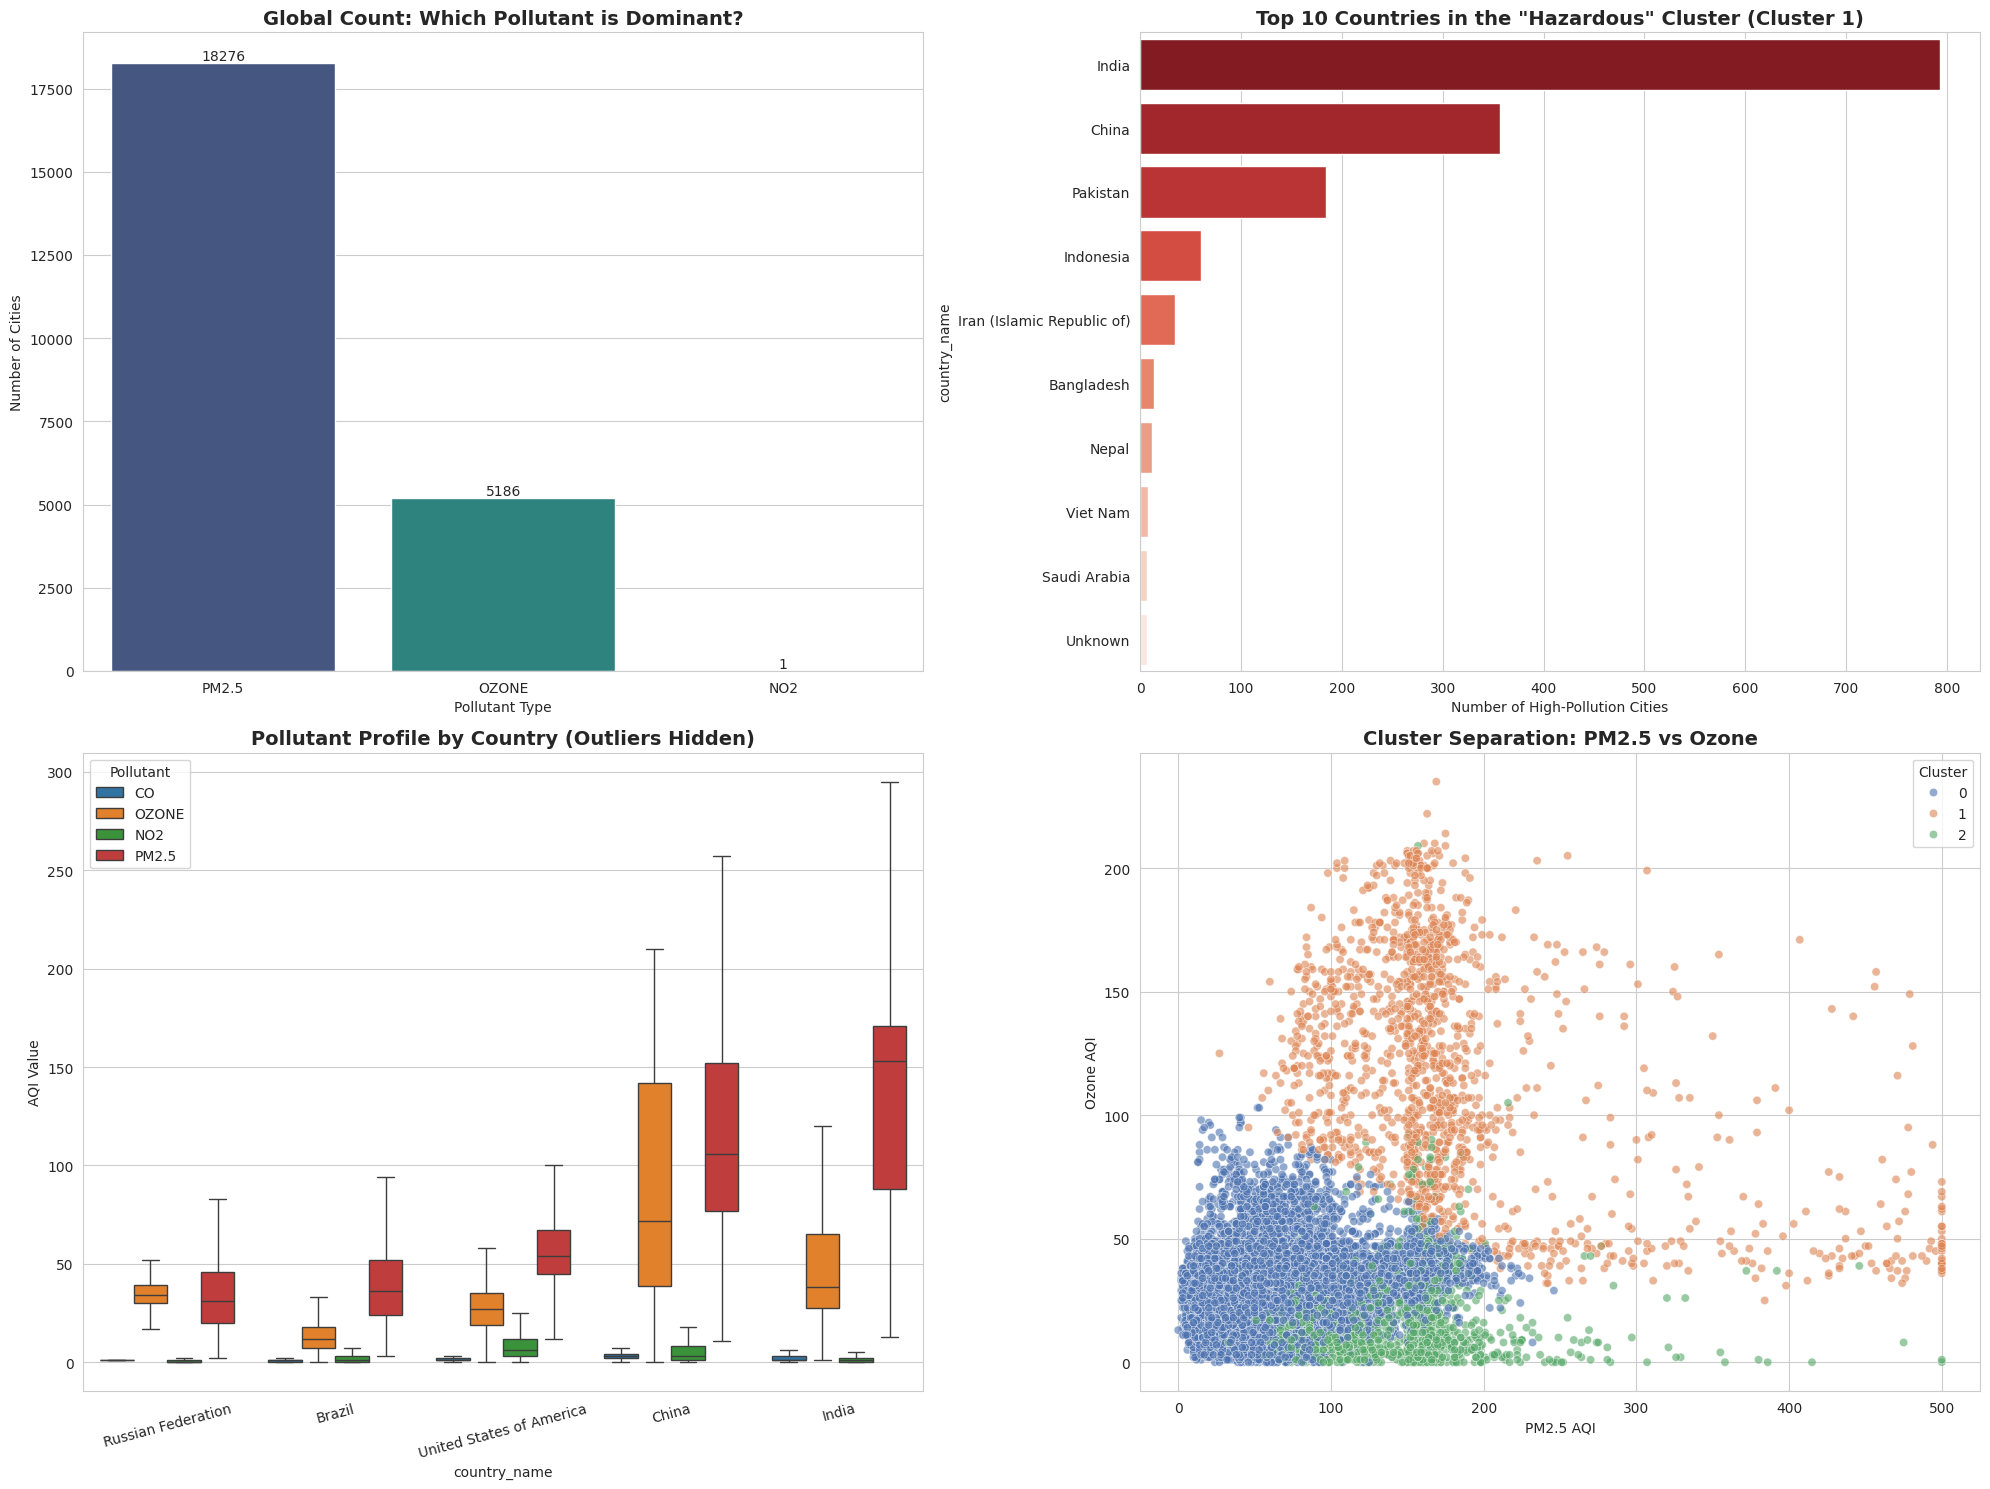

In [22]:
sns.set_style("whitegrid")

# List of pollutant columns
pollutant_cols = ['co_aqi_value', 'ozone_aqi_value', 'no2_aqi_value', 'pm2.5_aqi_value']

# a new column 'Dominant_Pollutant'
# .idxmax() finds the column name with the highest value in that row
df['Dominant_Pollutant'] = df[pollutant_cols].idxmax(axis=1)

df['Dominant_Pollutant'] = df['Dominant_Pollutant'].str.replace('_aqi_value', '').str.upper()

print("Dominant Pollutant Calculation Complete.")
print(df['Dominant_Pollutant'].value_counts())

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[pollutant_cols])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = df.groupby('Cluster')['aqi_value'].mean()
hazardous_cluster_id = cluster_means.idxmax()
safest_cluster_id = cluster_means.idxmin()

print(f"\nCluster Analysis:")
print(f"The Hazardous Cluster is Cluster #{hazardous_cluster_id} (Avg AQI: {cluster_means.max():.2f})")
print(f"The Safest Cluster is Cluster #{safest_cluster_id} (Avg AQI: {cluster_means.min():.2f})")

plt.figure(figsize=(20, 15))

# Plot A: Which pollutant is the main problem globally?
plt.subplot(2, 2, 1)
ax1 = sns.countplot(data=df, x='Dominant_Pollutant', order=df['Dominant_Pollutant'].value_counts().index, palette='viridis')
plt.title('Global Count: Which Pollutant is Dominant?', fontsize=14, fontweight='bold')
plt.xlabel('Pollutant Type')
plt.ylabel('Number of Cities')
for container in ax1.containers:
    ax1.bar_label(container)

# Plot B: Where are the "Hazardous" cities located? (Geography of Cluster 1)
plt.subplot(2, 2, 2)
# Filter only for the hazardous cluster
hazardous_df = df[df['Cluster'] == hazardous_cluster_id]
# Get top 10 countries in this bad cluster
top_polluted_countries = hazardous_df['country_name'].value_counts().head(10)
sns.barplot(y=top_polluted_countries.index, x=top_polluted_countries.values, palette='Reds_r')
plt.title(f'Top 10 Countries in the "Hazardous" Cluster (Cluster {hazardous_cluster_id})', fontsize=14, fontweight='bold')
plt.xlabel('Number of High-Pollution Cities')

# Plot C: Country Comparison (Box Plot) - What are they breathing?
plt.subplot(2, 2, 3)
# Select a few major countries for comparison (You can change these names!)
target_countries = ['United States of America', 'India', 'China', 'Brazil', 'Russian Federation']
subset = df[df['country_name'].isin(target_countries)].copy()

# Melt the data to make it compatible with seaborn boxplot
subset_melted = subset.melt(id_vars=['country_name'], value_vars=pollutant_cols,
                            var_name='Pollutant', value_name='AQI Value')
subset_melted['Pollutant'] = subset_melted['Pollutant'].str.replace('_aqi_value', '').str.upper()

sns.boxplot(data=subset_melted, x='country_name', y='AQI Value', hue='Pollutant', showfliers=False)
plt.title('Pollutant Profile by Country (Outliers Hidden)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15)

# Plot D: Scatter Plot of Clusters (PM2.5 vs Ozone)
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, x='pm2.5_aqi_value', y='ozone_aqi_value', hue='Cluster', palette='deep', alpha=0.6)
plt.title('Cluster Separation: PM2.5 vs Ozone', fontsize=14, fontweight='bold')
plt.xlabel('PM2.5 AQI')
plt.ylabel('Ozone AQI')

plt.tight_layout()
plt.show()

### Inference of Graphs from Cell 6

1.  **Global Count: Which Pollutant is Dominant? (Plot A)**:
    *   This bar chart shows which pollutant type (CO, Ozone, NO2, PM2.5) has the highest AQI value most frequently across all cities in the dataset. It helps identify the most widespread or common dominant pollutant globally, giving an overall picture of the primary air quality challenge. In your output, PM2.5 is clearly the dominant pollutant.

2.  **Top 10 Countries in the 'Hazardous' Cluster (Plot B)**:
    *   This horizontal bar chart highlights the countries with the most cities falling into the 'Hazardous' K-Means cluster (identified as the cluster with the highest average AQI). This directly points to the geographical areas most affected by poor air quality, allowing for targeted intervention or further investigation into specific regions.

3.  **Pollutant Profile by Country (Outliers Hidden) (Plot C)**:
    *   This box plot compares the distribution of AQI values for different pollutants across selected countries. By visualizing the median, quartiles, and range (without outliers), it allows for a quick comparison of the typical air quality profiles in various nations. You can infer which countries generally have higher levels of specific pollutants and how varied the levels are within those countries.

4.  **Cluster Separation: PM2.5 vs Ozone (Plot D)**:
    *   This scatter plot shows how the K-Means clusters are separated when considering PM2.5 AQI values against Ozone AQI values. It helps visualize if the clusters are distinct in terms of these two important pollutants and if there are clear boundaries or overlaps between the groups, further validating the clustering results. You can see if certain clusters are characterized by high PM2.5 and low Ozone, or vice-versa, or if they have balanced levels.

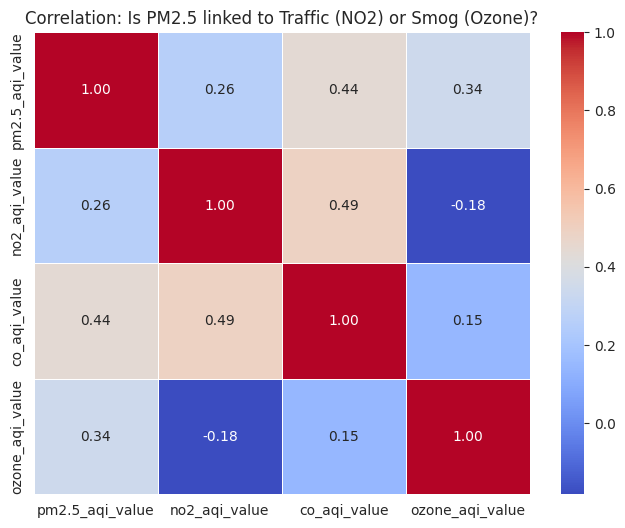


--- Training Machine Learning Model to Predict PM2.5 ---
Model Accuracy (R^2 Score): 0.35 (1.0 is perfect)


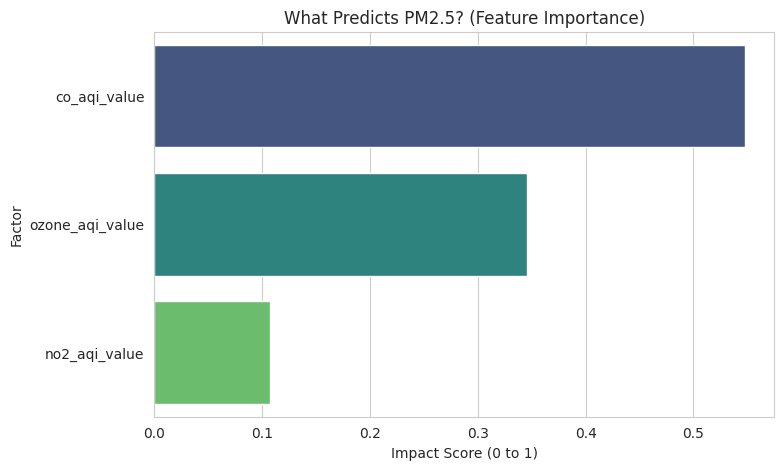


--- Insight: The Neglected Factor ---
We found 19959 cities where PM2.5 is extreme but Traffic (NO2) is low.
Top 5 Cities with Non-Traffic Pollution (likely Dust/Burning):
         country_name         city_name  pm2.5_aqi_value  no2_aqi_value
0  Russian Federation        Praskoveya               51              0
1              Brazil  Presidente Dutra               41              1
2               Italy   Priolo Gargallo               66              2
3              Poland         Przasnysz               20              0
4              France          Punaauia                6              0


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# We only select the numeric pollutant columns
cols = ['pm2.5_aqi_value', 'no2_aqi_value', 'co_aqi_value', 'ozone_aqi_value']
corr_matrix = df[cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation: Is PM2.5 linked to Traffic (NO2) or Smog (Ozone)?')
plt.show()

print("\n--- Training Machine Learning Model to Predict PM2.5 ---")

# X = Predictors (NO2, Ozone, CO)
X = df[['no2_aqi_value', 'co_aqi_value', 'ozone_aqi_value']]
# y = Target (PM2.5)
y = df['pm2.5_aqi_value']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Test Accuracy
score = rf_model.score(X_test, y_test)
print(f"Model Accuracy (R^2 Score): {score:.2f} (1.0 is perfect)")

# FEATURE IMPORTANCE ("Top Factors that Cause It")
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for plotting
fi_df = pd.DataFrame({'Factor': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Factor', data=fi_df, palette='viridis')
plt.title('What Predicts PM2.5? (Feature Importance)')
plt.xlabel('Impact Score (0 to 1)')
plt.show()

# FINDING THE NEGLECTED FACTOR (Ratio Analysis)

# Avoid division by zero by replacing 0 with 0.1
df['no2_safe'] = df['no2_aqi_value'].replace(0, 0.1)
df['Pollution_Ratio'] = df['pm2.5_aqi_value'] / df['no2_safe']

# Identify cities where the pollution is NOT from cars (High Ratio)
# Ratio > 10 means PM2.5 is 10x higher than NO2 -> Likely Dust/Burning
non_traffic_pollution = df[df['Pollution_Ratio'] > 10]

print(f"\n--- Insight: The Neglected Factor ---")
print(f"We found {len(non_traffic_pollution)} cities where PM2.5 is extreme but Traffic (NO2) is low.")
print("Top 5 Cities with Non-Traffic Pollution (likely Dust/Burning):")
print(non_traffic_pollution[['country_name', 'city_name', 'pm2.5_aqi_value', 'no2_aqi_value']].head(5))

### Inference of Graphs from Cell 9

1.  **Correlation: Is PM2.5 linked to Traffic (NO2) or Smog (Ozone)? (Correlation Heatmap)**:
    *   This heatmap shows the correlation coefficients between PM2.5 and other pollutants (NO2, CO, Ozone). It directly addresses the question of whether PM2.5 is more closely linked to traffic-related emissions (NO2) or other factors like CO and Ozone. A higher positive correlation indicates a stronger relationship.

2.  **What Predicts PM2.5? (Feature Importance Bar Plot)**:
    *   This bar plot displays the importance of each predictor variable (NO2, CO, Ozone) in the RandomForestRegressor model trained to predict PM2.5. Features with higher importance scores have a greater impact on the model's predictions. This helps identify which pollutants are the most significant factors in determining PM2.5 levels according to the model.

3.  **Risk Analysis: If Source is 'Unhealthy', how likely is PM2.5 'Hazardous'? (Bar Plot)**:
    *   This bar plot visualizes the conditional probabilities calculated in the risk analysis. For example, it shows the probability of PM2.5 being 'Hazardous' given that CO is 'Unhealthy', or NO2 is 'Unhealthy', or Ozone is 'Unhealthy'. This graph directly answers the question of how likely a 'Hazardous' PM2.5 event is when another specific pollutant is already at an 'Unhealthy' level. In your output, it shows that if CO is unhealthy, there is a 100% chance of PM2.5 being hazardous, while if NO2 is unhealthy, there is a 0% chance, and for Ozone, it's 2.6%.


--- 4. Calculating Risk Probability (Conditional Probability) ---

RISK ANALYSIS RESULTS:
P(PM2.5 is Hazardous | CO is Unhealthy)    = 100.0%
P(PM2.5 is Hazardous | NO2 is Unhealthy)   = 0.0%
P(PM2.5 is Hazardous | Ozone is Unhealthy) = 2.6%


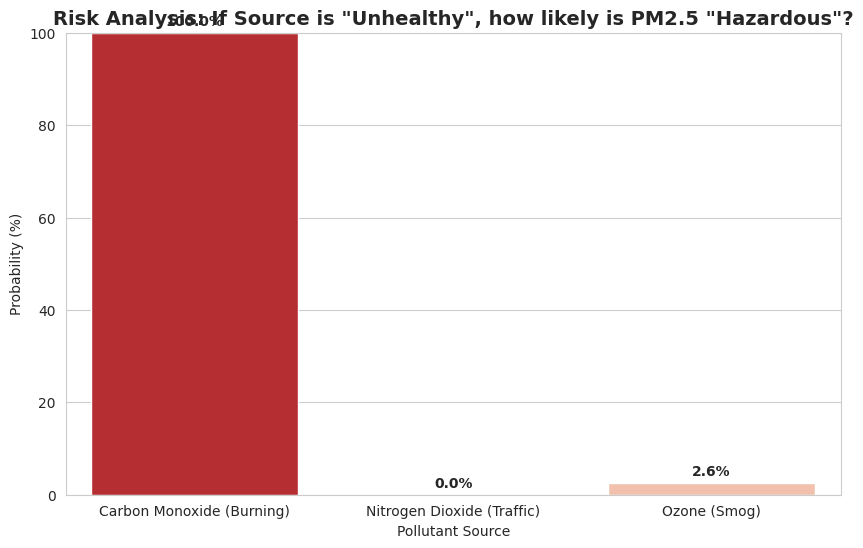

In [24]:
print("\n--- 4. Calculating Risk Probability (Conditional Probability) ---")

# Helper function to calculate probability P(Target | Condition)
def calculate_conditional_prob(df, condition_col, condition_val, target_col, target_val):
    # 1. Filter: Find all cities where the "Cause" happened (e.g., CO is Unhealthy)
    # string contains to capture 'Unhealthy' and 'Very Unhealthy' if needed
    subset = df[df[condition_col].astype(str).str.contains(condition_val, case=False, na=False)]

    if len(subset) == 0:
        return 0.0

    # 2. Count: How many of those also have the "Effect" (e.g., Hazardous PM2.5)
    target_subset = subset[subset[target_col].astype(str).str.contains(target_val, case=False, na=False)]
    target_count = len(target_subset)

    # 3. Probability: (Joint Occurrence) / (Condition Occurrence)
    probability = (target_count / len(subset)) * 100
    return probability

# check if the Pollutant is 'Unhealthy' -> Does it lead to 'Hazardous' PM2.5?
condition_level = 'Unhealthy'
target_level = 'Hazardous'

# Calculate Probabilities for each Pollutant
prob_co = calculate_conditional_prob(df, 'co_aqi_category', condition_level, 'pm2.5_aqi_category', target_level)
prob_no2 = calculate_conditional_prob(df, 'no2_aqi_category', condition_level, 'pm2.5_aqi_category', target_level)
prob_ozone = calculate_conditional_prob(df, 'ozone_aqi_category', condition_level, 'pm2.5_aqi_category', target_level)

print(f"\nRISK ANALYSIS RESULTS:")
print(f"P(PM2.5 is Hazardous | CO is Unhealthy)    = {prob_co:.1f}%")
print(f"P(PM2.5 is Hazardous | NO2 is Unhealthy)   = {prob_no2:.1f}%")
print(f"P(PM2.5 is Hazardous | Ozone is Unhealthy) = {prob_ozone:.1f}%")

risks = pd.DataFrame({
    'Pollutant Source': ['Carbon Monoxide (Burning)', 'Nitrogen Dioxide (Traffic)', 'Ozone (Smog)'],
    'Probability of Hazardous PM2.5': [prob_co, prob_no2, prob_ozone]
})

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=risks, x='Pollutant Source', y='Probability of Hazardous PM2.5', palette='Reds_r')
plt.title(f'Risk Analysis: If Source is "{condition_level}", how likely is PM2.5 "{target_level}"?', fontsize=14, fontweight='bold')
plt.ylabel('Probability (%)')
plt.ylim(0, 100)

for i in ax.containers:
    ax.bar_label(i, fmt='%.1f%%', padding=3, fontweight='bold')

plt.show()

### Inference of Graphs from Cell 11

1.  **Risk Analysis: If Source is 'Unhealthy', how likely is PM2.5 'Hazardous'? (Bar Plot)**:
    *   This bar plot visualizes the conditional probabilities calculated in the risk analysis. It shows the probability of PM2.5 being 'Hazardous' given that another specific pollutant (CO, NO2, or Ozone) is at an 'Unhealthy' level. From the output, we can infer that if Carbon Monoxide (CO) is at an 'Unhealthy' level, there is a 100% probability that PM2.5 will be 'Hazardous'. Conversely, if Nitrogen Dioxide (NO2) is 'Unhealthy', the probability of PM2.5 being 'Hazardous' is 0%. If Ozone is 'Unhealthy', there is a 2.6% chance of PM2.5 being 'Hazardous'. This suggests that 'Unhealthy' CO levels are a very strong indicator of 'Hazardous' PM2.5 conditions, while 'Unhealthy' NO2 levels are not, and 'Unhealthy' Ozone levels have a minor association.